In [1]:
import simpy
from simpy.events import AnyOf, AllOf, Event

class car:
    def __init__(self, env, name, bcs, driving_time, charge_duration):
        self.env = env
        self.name = name
        self.bcs = bcs
        self.driving_time = driving_time
        self.charge_duration = charge_duration
        #self.proc = env.process(self.drive())
        self.driving_times = 0

    # def run(self):
    #     while True:
    #         self.drive()

    def drive(self):
        name, bcs, driving_time, charge_duration = self.name, self.bcs, self.driving_time, self.charge_duration
        while True:
            # Simulate driving to the BCS
            yield env.timeout(driving_time)

            # Request one of its charging spots
            print('%s arriving at %d' % (name, env.now))
            with bcs.request() as req:
                yield req

                # Charge the battery
                print('%s starting to charge at %s' % (name, env.now))
                yield env.timeout(charge_duration)
                print('%s leaving the bcs at %s' % (name, env.now))
            self.driving_times += 1
        
env = simpy.Environment()
bcs = simpy.Resource(env, capacity=2)
cars = [car(env, 'Car %d' % i, bcs, i*2, 5) for i in range(4)]
procs = [env.process(car.drive()) for car in cars]

# env.process(run(cars))

env.run(until=100)

Car 0 arriving at 0
Car 0 starting to charge at 0
Car 1 arriving at 2
Car 1 starting to charge at 2
Car 2 arriving at 4
Car 0 leaving the bcs at 5
Car 0 arriving at 5
Car 2 starting to charge at 5
Car 3 arriving at 6
Car 1 leaving the bcs at 7
Car 0 starting to charge at 7
Car 1 arriving at 9
Car 2 leaving the bcs at 10
Car 3 starting to charge at 10
Car 0 leaving the bcs at 12
Car 0 arriving at 12
Car 1 starting to charge at 12
Car 2 arriving at 14
Car 3 leaving the bcs at 15
Car 0 starting to charge at 15
Car 1 leaving the bcs at 17
Car 2 starting to charge at 17
Car 1 arriving at 19
Car 0 leaving the bcs at 20
Car 0 arriving at 20
Car 1 starting to charge at 20
Car 3 arriving at 21
Car 2 leaving the bcs at 22
Car 0 starting to charge at 22
Car 1 leaving the bcs at 25
Car 3 starting to charge at 25
Car 2 arriving at 26
Car 0 leaving the bcs at 27
Car 1 arriving at 27
Car 0 arriving at 27
Car 2 starting to charge at 27
Car 3 leaving the bcs at 30
Car 1 starting to charge at 30
Car 2 l

In [16]:
def gen():
    yield 'bread'

def gengen():
    while True:
        gen()


l = gengen()

KeyboardInterrupt: 

In [11]:
cnt

9

In [10]:
env = simpy.Environment()
bcs = simpy.Resource(env, capacity=2)
cars = [car(env, 'Car %d' % i, bcs, i*2, 5) for i in range(4)]
procs = [env.process(car.drive()) for car in cars]
global cnt
cnt = 0
def run(cars):
    global cnt
    while True:
        ret = yield AnyOf(env, [env.process(car.drive()) for car in cars])
        cnt += 1

env.process(run(cars))
env.run(until=100)

Car 0 arriving at 0
Car 0 arriving at 0
Car 0 starting to charge at 0
Car 0 starting to charge at 0
Car 1 arriving at 2
Car 1 arriving at 2
Car 2 arriving at 4
Car 2 arriving at 4
Car 0 leaving the bcs at 5
Car 0 leaving the bcs at 5
Car 1 starting to charge at 5
Car 1 starting to charge at 5
Car 0 arriving at 5
Car 3 arriving at 6
Car 3 arriving at 6
Car 1 arriving at 7
Car 2 arriving at 9
Car 1 leaving the bcs at 10
Car 1 leaving the bcs at 10
Car 2 starting to charge at 10
Car 2 starting to charge at 10
Car 3 arriving at 11
Car 2 leaving the bcs at 15
Car 2 leaving the bcs at 15
Car 0 starting to charge at 15
Car 3 starting to charge at 15
Car 0 leaving the bcs at 20
Car 3 leaving the bcs at 20
Car 3 starting to charge at 20
Car 1 starting to charge at 20
Car 0 arriving at 20
Car 1 arriving at 22
Car 2 arriving at 24
Car 3 leaving the bcs at 25
Car 1 leaving the bcs at 25
Car 2 starting to charge at 25
Car 3 starting to charge at 25
Car 3 arriving at 26
Car 2 leaving the bcs at 30
C

In [4]:
import simpy
from simpy.events import AnyOf, AllOf, Event

class car:
    def __init__(self, env, name, bcs, driving_time, charge_duration):
        self.env = env
        self.name = name
        self.bcs = bcs
        self.driving_time = driving_time
        self.charge_duration = charge_duration
        #self.proc = env.process(self.drive())
        self.driving_times = 0

    def run(self):
        while True:
            self.drive()

    def drive(self):
        name, bcs, driving_time, charge_duration = self.name, self.bcs, self.driving_time, self.charge_duration
        # Simulate driving to the BCS
        yield env.timeout(driving_time)

        # Request one of its charging spots
        print('%s arriving at %d' % (name, env.now))
        with bcs.request() as req:
            yield req

            # Charge the battery
            print('%s starting to charge at %s' % (name, env.now))
            yield env.timeout(charge_duration)
            print('%s leaving the bcs at %s' % (name, env.now))
        self.driving_times += 1
        
# env = simpy.Environment()
# bcs = simpy.Resource(env, capacity=2)
# cars = [car(env, 'Car %d' % i, bcs, i*2, 5) for i in range(4)]
# procs = [env.process(car.run()) for car in cars]
# def run(cars):
#     while True:
#         ret = yield AnyOf(env, procs)
#         print(ret)

# env.process(run(cars))
# env.run(until=100)

In [15]:
env = simpy.Environment()
bcs = simpy.Resource(env, capacity=2)

for i in range(4):
    env.process(car(env, 'Car %d' % i, bcs, i*2, 5))

In [23]:
Event(env).env

In [10]:
from simpy.events import AnyOf, AllOf, Event
events = [Event(env) for i in range(3)]
a = AnyOf(env, events)  # Triggers if at least one of "events" is triggered.
b = AllOf(env, events)

In [19]:
def test_condition(env):
    t1, t2 = env.timeout(1, value='spam'), env.timeout(2, value='eggs')
    ret = yield t1 | t2
    print(env.now)
    assert ret == {t1: 'spam'}

    t1, t2 = env.timeout(1, value='spam'), env.timeout(2, value='eggs')
    ret = yield t1 & t2
    print(env.now)
    assert ret == {t1: 'spam', t2: 'eggs'}

    # You can also concatenate & and |
    e1, e2, e3 = [env.timeout(i) for i in range(3)]
    yield (e1 | e2) & e3
    print(env.now)
    assert all(e.processed for e in [e1, e2, e3])

env = simpy.Environment()
proc = env.process(test_condition(env))
env.run()

1
3
5


In [1]:
def act():
    yield 'hi'

In [8]:
def take_action():
    yield from act()

In [10]:
next(take_action())

'hi'

In [17]:
np.zeros((5,4))[1].shape

(4,)

In [9]:
import pickle
data = pickle.load(open('../data.pkl', 'rb'))

In [14]:
data_plot

array([[0,
        list([360, 720, 1080, 1440, 1800, 2160, 2520, 2880, 6388.438810415332, 6736.9405814251295, 7221.468037225964, 7795.089002276407, 8441.569684842461, 8621.569684842461, 9061.601173346164, 9275.363852383027])],
       [0,
        list([360, 720, 1080, 1440, 1800, 2160, 2520, 2880, 6388.438810415332, 6736.9405814251295, 7221.468037225964, 7795.089002276407, 8441.569684842461, 8621.569684842461, 9061.601173346164, 9275.363852383027])],
       [0,
        list([360, 720, 1080, 1440, 1800, 2160, 2520, 2880, 6388.438810415332, 6736.9405814251295, 7221.468037225964, 7795.089002276407, 8441.569684842461, 8621.569684842461, 9061.601173346164, 9275.363852383027])],
       [0,
        list([360, 720, 1080, 1440, 1800, 2160, 2520, 2880, 6388.438810415332, 6736.9405814251295, 7221.468037225964, 7795.089002276407, 8441.569684842461, 8621.569684842461, 9061.601173346164, 9275.363852383027])],
       [0,
        list([360, 720, 1080, 1440, 1800, 2160, 2520, 2880, 6388.438810415332, 67

<AxesSubplot: >

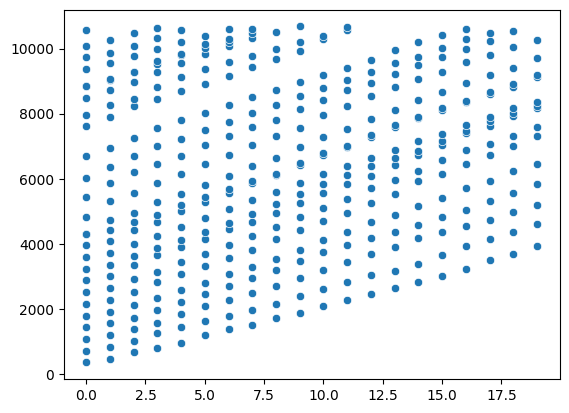

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
data = pickle.load(open('../data.pkl', 'rb'))
data_plot = np.array([[k, i] for k, v in data.items() for i in v])
sns.scatterplot(x=data_plot[:, 0], y=data_plot[:, 1])